In [96]:
import pickle

with open("/Yourpath/FuBIF/results/numeric/time/Ellipsoid_2024-06-13_22-33-59.pkl", "rb") as f:
    data_time_1 = pickle.load(f)
data_time_1["Hyperplane"] = data_time_1["Hyperplane"]

with open("/Yourpath/FuBIF/results/numeric/time/Hyperbolic_2024-06-13_22-06-03.pkl","rb") as f:
    data_time_2 = pickle.load(f)
data_time_2["Hyperplane"] = data_time_1["Hyperplane"]

with open("/Yourpath/FuBIF/results/numeric/time/Hyperplane_2024-06-13_21-27-05.pkl","rb") as f:
    data_time_3 = pickle.load(f)

with open("/Yourpath/FuBIF/results/numeric/time/Hypersphere_2024-06-13_21-39-44.pkl","rb") as f:
    data_time_4 = pickle.load(f)
data_time_4["Hyperplane"] = data_time_3["Hyperplane"]
    
with open("/Yourpath/FuBIF/results/numeric/time/NN_2024-06-13_19-58-35.pkl","rb") as f:
    data_time_5 = pickle.load(f)
data_time_5["Hyperplane"] = data_time_3["Hyperplane"]
    
with open("/Yourpath/FuBIF/results/numeric/time/Paraboloid_2024-06-13_23-00-15.pkl","rb") as f:
    data_time_6 = pickle.load(f)
data_time_6["Hyperplane"] = data_time_3["Hyperplane"]
    
with open("/Yourpath/FuBIF/results/numeric/time/Quadric_2024-06-13_23-19-18.pkl","rb") as f:
    data_time_7 = pickle.load(f)

data_time_7["Hyperplane"] = data_time_3["Hyperplane"]
    
with open("/Yourpath/FuBIF/results/numeric/time/SingleDimension_2024-06-13_21-53-04.pkl","rb") as f:
    data_time_8 = pickle.load(f)

data_time_8["Hyperplane"] = data_time_3["Hyperplane"]

with open("/Yourpath/FuBIF/results/numeric/time/2024-06-12_16-37-56.pkl","rb") as f:
    data_time_10 = pickle.load(f)

del data_time_10["Hyperplane"]

with open("/Yourpath/FuBIF/results/numeric/time/2024-06-12_17-16-56.pkl","rb") as f:
    data_time_9 = pickle.load(f)

with open("/Yourpath/FuBIF/results/numeric/time/2024-06-12_16-36-40.pkl","rb") as f:
    data_time_11 = pickle.load(f)

del data_time_11["Hyperplane"]
    

In [97]:
data_time_7.keys()

dict_keys(['Hyperplane', 'Quadric'])

In [98]:
data_time = {**data_time_1, **data_time_2, **data_time_3, **data_time_4, **data_time_5, **data_time_6, **data_time_7, **data_time_8, **data_time_10, **data_time_11, **data_time_9}

In [99]:
data_time.keys()

dict_keys(['Hyperplane', 'Ellipsoid', 'Hyperbolic', 'Hypersphere', 'NN', 'Paraboloid', 'Quadric', 'SingleDimension', 'IForest', 'AutoEncoder', 'DIF'])

## Extract time

In [100]:
path = "/Yourpath/FuBIF/results/plots/time/"

In [101]:
time_fit = {}
time_pred = {}
time_interp = {}
for model in data_time.keys():
    time_fit[model] = {"n":{},"d":{}}
    time_pred[model] = {"n":{},"d":{}}
    time_interp[model] = {"n":{},"d":{}}
    for dataset in data_time[model].keys():
        n,d = int(dataset.split("_")[0]),int(dataset.split("_")[1])
        if d == 6:
            time_fit[model]["n"][n] = {}
            time_pred[model]["n"][n] = {}
            time_interp[model]["n"][n] = {}
            data_fit = data_time[model][dataset]["Time_fit"][1:]
            data_pred = data_time[model][dataset]["Time_predict"][1:]
            data_interp = data_time[model][dataset]["Time_interpretations"][1:]
            time_fit[model]["n"][n] = (np.quantile(data_fit,0.05), np.median(data_fit),np.quantile(data_fit,0.95))
            time_pred[model]["n"][n] = (np.quantile(data_pred,0.05), np.median(data_pred),np.quantile(data_pred,0.95))
            time_interp[model]["n"][n] = (np.quantile(data_interp,0.05), np.median(data_interp),np.quantile(data_interp,0.95))
        if n == 1000:
            time_fit[model]["d"][d] = {}
            time_pred[model]["d"][d] = {}
            time_interp[model]["d"][d] = {}
            data_fit = data_time[model][dataset]["Time_fit"][1:]
            data_pred = data_time[model][dataset]["Time_predict"][1:]
            data_interp = data_time[model][dataset]["Time_interpretations"][1:]
            time_fit[model]["d"][d] = (np.quantile(data_fit,0.05), np.median(data_fit),np.quantile(data_fit,0.95))
            time_pred[model]["d"][d] = (np.quantile(data_pred,0.05), np.median(data_pred),np.quantile(data_pred,0.95))
            time_interp[model]["d"][d] = (np.quantile(data_interp,0.05), np.median(data_interp),np.quantile(data_interp,0.95))

In [102]:
import matplotlib.pyplot as plt

In [103]:
l = sorted(time_fit['Hyperplane']["n"].keys())
d = sorted(time_fit['Hyperplane']["d"].keys())

# Fit

In [104]:
time_fit['DIF']["d"]

{8: (0.7651391386985779, 0.7826828956604004, 0.7935783267021179),
 14: (0.8323438048362732, 0.8512294292449951, 0.9255331993103026),
 16: (0.805195415019989, 0.8258295059204102, 0.8442096829414367),
 12: (0.80181884765625, 0.8092836141586304, 0.8201381444931031),
 10: (0.7799880027770996, 0.801414966583252, 0.8147413730621338)}

In [105]:
dict_models = {"Hyperplane": "EIF",
"Ellipsoid": "Ellipsoid-IF",
"Hyperbolic": "Hyperbolic-IF",
"Hypersphere": "HIF",
"NN": "NN-IF",
"Paraboloid": "Paraboloid-IF",
"Quadric": "Quadric-IF",
"SingleDimension": "IF",
"IForest": "IForest",
"AutoEncoder": "AutoEncoder",
"DIF": "DIF"}

Hyperplane
Ellipsoid
Hyperbolic
Hypersphere
NN
Paraboloid
Quadric
SingleDimension
IForest
AutoEncoder
DIF


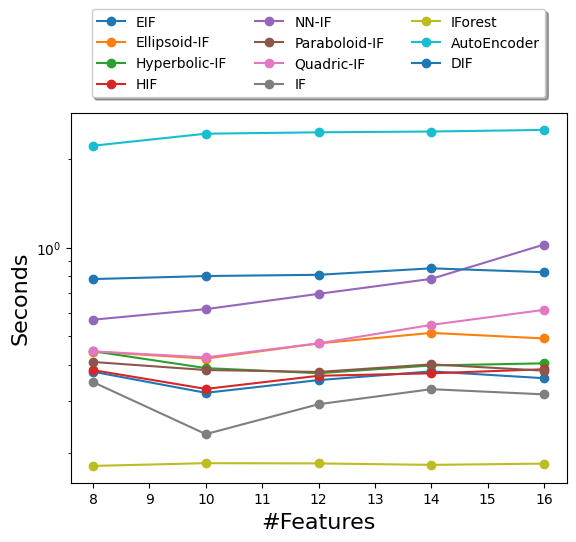

In [106]:

# dimensions

for model in time_fit.keys():
    mean = []
    print(model)
    plt.plot(d,[time_fit[model]["d"][i][1] for i in d],label=dict_models[model],marker = "o")
    #plt.fill_between(d,[time[model]["d"][i][0] for i in d],[time[model]["d"][i][2] for i in d],alpha=0.2)
plt.yscale("log")
plt.xlabel("#Features", fontsize =16)
plt.ylabel("Seconds",fontsize = 16)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.30), shadow=True, ncol=3)
plt.savefig(path+"Fit_"+"Features.png",bbox_inches='tight')
plt.show()

        
    

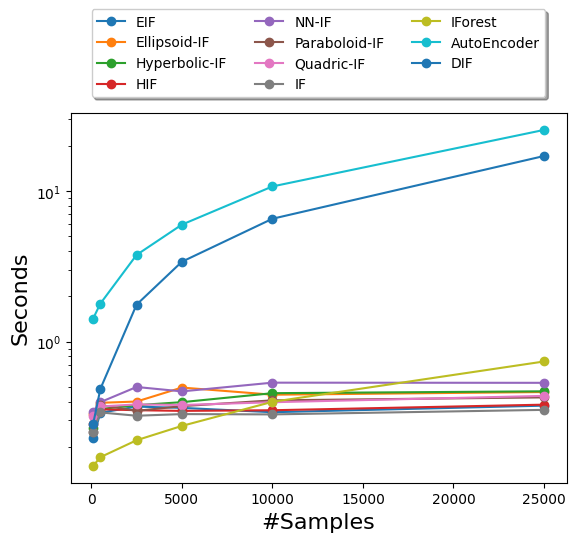

In [107]:
# dataset lenght
for model in time_fit.keys():
    mean = []
    plt.plot(l,[time_fit[model]["n"][i][1] for i in l],label=dict_models[model],marker = "o")
    #plt.fill_between(l,[time[model]["n"][i][0] for i in l],[time[model]["n"][i][2] for i in l],alpha=0.2)
plt.yscale("log")
plt.xlabel("#Samples", fontsize =16)
plt.ylabel("Seconds",fontsize = 16)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.30), shadow=True, ncol=3)
plt.savefig(path+"Fit_"+"Samples.png",bbox_inches='tight')
plt.show()


# Predict

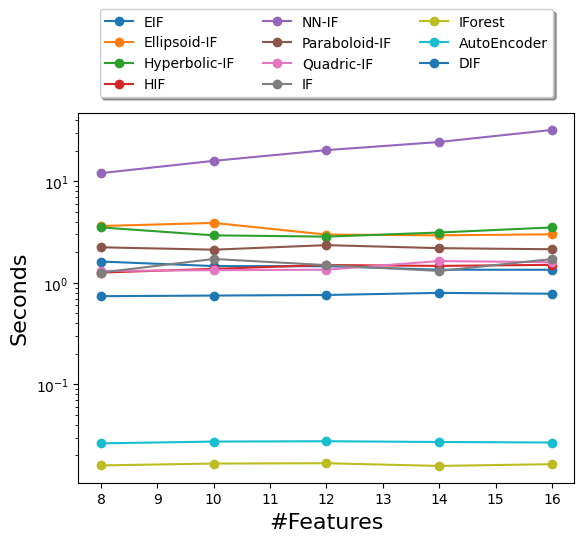

In [108]:
for model in time_pred.keys():
    mean = []
    plt.plot(d,[time_pred[model]["d"][i][1] for i in d],label=dict_models[model],marker = "o")
    #plt.fill_between(d,[time[model]["d"][i][0] for i in d],[time[model]["d"][i][2] for i in d],alpha=0.2)
plt.yscale("log")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.30), shadow=True, ncol=3)
plt.xlabel("#Features", fontsize =16)
plt.ylabel("Seconds",fontsize = 16)
plt.savefig(path+"Predict_"+"Features.png",bbox_inches='tight')
plt.show()

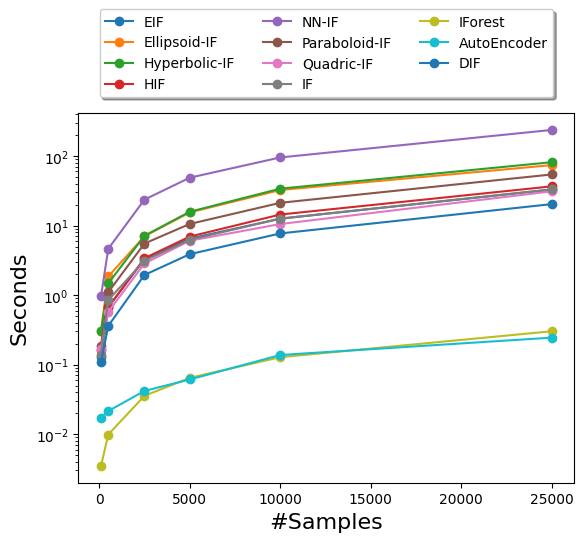

In [109]:
# dataset lenght
for model in time_pred.keys():
    mean = []
    plt.plot(l,[time_pred[model]["n"][i][1] for i in l],label=dict_models[model],marker = "o")
    #plt.fill_between(l,[time[model]["n"][i][0] for i in l],[time[model]["n"][i][2] for i in l],alpha=0.2)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.30), shadow=True, ncol=3)
plt.yscale("log")
plt.xlabel("#Samples", fontsize =16)
plt.ylabel("Seconds",fontsize = 16)
plt.savefig(path+"Predict_"+"Samples.png",bbox_inches='tight')
plt.show()

# Interpretation

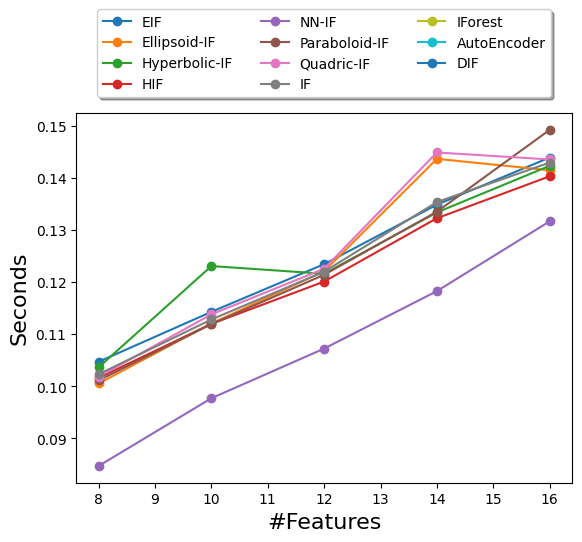

In [110]:
for model in time_interp.keys():
    mean = []
    plt.plot(d,[time_interp[model]["d"][i][1] for i in d],label=dict_models[model],marker = "o")
    #plt.fill_between(d,[time[model]["d"][i][0] for i in d],[time[model]["d"][i][2] for i in d],alpha=0.2)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.30), shadow=True, ncol=3)
plt.xlabel("#Features", fontsize =16)
plt.ylabel("Seconds",fontsize = 16)
plt.savefig(path+"Interpr_"+"Features.png",bbox_inches='tight')
plt.show()

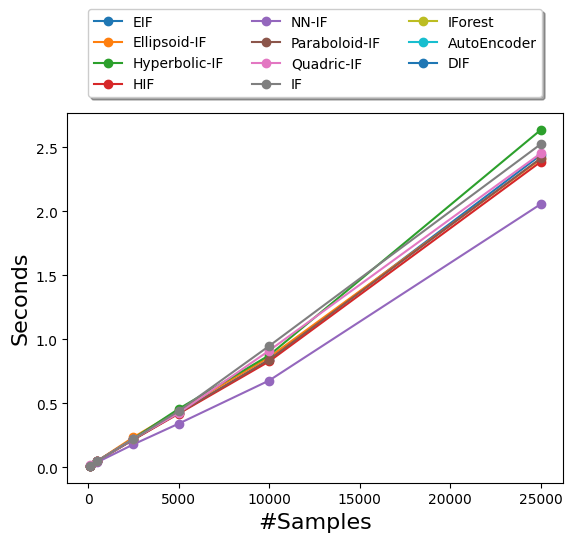

In [111]:
# dataset lenght
for model in time_interp.keys():
    mean = []
    plt.plot(l,[time_interp[model]["n"][i][1] for i in l],label=dict_models[model],marker = "o")
    #plt.fill_between(l,[time[model]["n"][i][0] for i in l],[time[model]["n"][i][2] for i in l],alpha=0.2)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.30), shadow=True, ncol=3)
plt.xlabel("#Samples", fontsize =16)
plt.ylabel("Seconds",fontsize = 16)
plt.savefig(path+"Interpr_"+"Samples.png",bbox_inches='tight')
plt.show()